# 平行多导线系统参数计算函数

文件名： conductor_calc1.pynb
日期： 2018.05.01
编写人： 陈剑云

 ## 多导线原始参数
 
 **牵引网导线架设横截面示意图**

  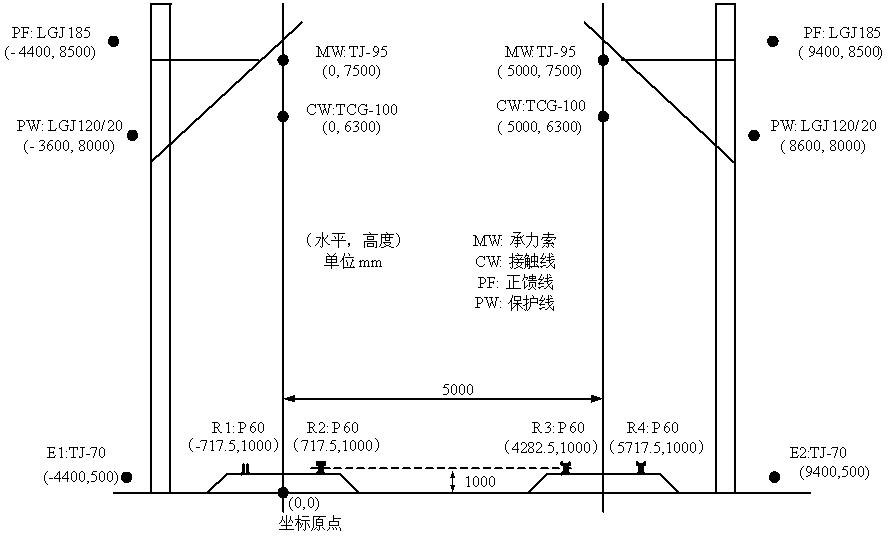   




** 导线编号：**
 
|导线号 | 导线代码 | 导线名称 |
|:---|:---|:---|
|01|CW1|接触导线1|
|02|MW1|承力索1|
|03|PF1|正馈线1|
|04|RA1|钢轨1|
|05|RA2|钢轨2|
|06|PW1|保护线1|
|07|E1|综合地线1|
|08|CW2|接触导线2|
|09|MW2|承力索2|
|10|PF2|正馈线2|
|11|RA3|钢轨3|
|12|RA4|钢轨4|
|13|PW2|保护线2|
|14|E2|综合地线2|
  
 


** 导线架设截面坐标：**

conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

** 导线计算半径：**
conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用
** 导线等效半径：**
conductors_equivalent_radius=0.001*np.array([4.2,5.31,9.03,12.79,12.79,7.22,4.055,4.2,5.31,9.03,12.79,12.79,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用
** 导线直流电阻：**
conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
                                    
                               
{原始参数在软件开发前期用数组形式给出，在后阶段以数据文件的形式存储，通过读取数据生成变量。}

In [181]:
import numpy as np
from scipy import linalg
from scipy import constants as C
from scipy import special

#导线定义

"""
1. 接触线（CW1）; 2.承力索（MW1）; 3.正馈线（PF1）; 4.钢轨1（RA1）;5.钢轨2（RA2）;6.保护线（PW1）;7.综合地线（E1）
8. 接触线（CW2）; 9.承力索（MW2）; 10.正馈线（PF2）; 11.钢轨3（RA3）;12.钢轨4（RA4）;13.保护线（PW2）;14.综合地线（E2）

"""
conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用

conductors_equivalent_radius=0.001*np.array([4.2,5.31,9.03,12.79,12.79,7.22,4.055,4.2,5.31,9.03,12.79,12.79,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用


conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
conductors_coordinater,conductors_calc_radius,conductors_equivalent_radius,conductors_resistance

(array([[ 0.   ,  6.3  ],
        [ 0.   ,  7.5  ],
        [-4.4  ,  8.5  ],
        [-0.755,  1.   ],
        [ 0.755,  1.   ],
        [-3.6  ,  8.   ],
        [-4.4  ,  0.5  ],
        [ 5.   ,  6.3  ],
        [ 5.   ,  7.5  ],
        [ 9.4  ,  8.5  ],
        [ 4.245,  1.   ],
        [ 5.755,  1.   ],
        [ 8.6  ,  8.   ],
        [ 9.4  ,  0.5  ]]),
 array([ 0.0059,  0.007 ,  0.0095,  0.1091,  0.1091,  0.0076,  0.0053,  0.0059,  0.007 ,  0.0095,  0.1091,  0.1091,  0.0076,  0.0053]),
 array([ 0.0042,  0.0053,  0.009 ,  0.0128,  0.0128,  0.0072,  0.0041,  0.0042,  0.0053,  0.009 ,  0.0128,  0.0128,  0.0072,  0.0041]),
 array([ 0.146,  0.158,  0.163,  0.135,  0.135,  0.255,  0.28 ,  0.146,  0.158,  0.163,  0.135,  0.135,  0.255,  0.28 ]))

## 电位系数矩阵计算
  **函数名：  calc_potential_coefficient(c_xy,r)** 
  
 * parameters:    
       1. c_xy:  2×n维数组，多导线的坐标（x,y）,单位m;  
       2. r:     1×n维数组，导线的半径,单位 m  
 * Return:
       1. P:     n×n维数组，电位系数   
 * 功能：        计算多导体的电位系数矩阵P。 
 
  计算公式：  
  
   $$ P_{ii}=\frac{1}{2\pi\epsilon}ln\frac{2h_{i}}{r_i}=18 ×10^9ln\frac{2h_{i}}{r_i}$$
   
   $$ P_{ij}=\frac{1}{2\pi\epsilon}ln\frac{D_{ij}}{d_{ij}}=18 ×10^9ln\frac{D_{ij}}{d_{ij}}  ~~~~ (i≠j) $$
   
   
   
  ![ 导体镜像截面图](/AT_calc/images/conductors_section.png "")
  
  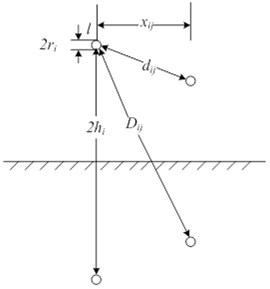
  

In [182]:
def calc_potential_coefficient(c_xy,r):
    """ 计算电位系数矩阵P
    """
  #  epsilon0=1/(36*np.pi)*10**-9         #空气介电系数
   # c_xy=conductors_coordinater          # 多导体坐标数组 (x,y),单位 m
   # R=conductors_calc_radius             #多导体计算半径，单位 m， 计算电位系数用
    n=np.shape(c_xy)[0]
    P=np.empty((n,n),np.float64)
    for i in range(n):
        for j in range(n):
            if i==j:
                P[i,i]=18*10**+9*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                P[i,j]=18*10**+9*np.log(Dij/dij)
    return P

 
  ** 函数名: merge_potential_coefficient(P,m,k)**
 * parameters:    
       1. P:      n×n 维数组，电位系数 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. P:      n-1×n-1 维数组，归并后的电位系数   
   
 * 功能：         导线k并入导线m,计算修正后的电位系数P
 
  导线k并入m公式推导：
 
 \begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}&\dots& P_{km}&\dots&P_{kk}&\dots&P_{kn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
 \end{equation}

令 $q_{m}=q_{m}+q_{k}$ 有： 

\begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&(P_{1k}-P_{1m})&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&(P_{mk}-P_{mm})&\dots&P_{mn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
   P_{k1}&\dots& P_{km}&\dots&(P_{kk}-P_{km})&\dots&P_{kn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\ 
   P_{n1}&\dots& P_{nm}&\dots&(P_{nk}-P_{nm})&\dots&P_{nn}\\
  \end{bmatrix}
  \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m+q_k\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation}   

P矩阵第k列参数发生变化，修正公式为：$$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n), q_m=q_m+q_k$$.

方程中，$u_{k}-u_{m}=0$,得方程

 \begin{equation*} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  0\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}- P_{m1}&\dots& P_{km}-P_{mm}&\dots&P_{kk}-P_{mk}&\dots&P_{kn}-P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation*}

第k行等式有:
$$ 0= (P_{k1}- P_{m1})q_1+\dots+（P_{km}-P_{mm})q_m+\dots+(P_{kk}-P_{mk})q_k+\dots+(P_{kn}-P_{mn})q_n$$

可以求得：
$$q_k=-\frac{(P_{k1}- P_{m1})}{(P_{kk}-P_{mk})}q_1-\dots-\frac{(P_{km}- P_{mm})}{(P_{kk}-P_{mk})}q_m\dots-\frac{(P_{kn}- P_{mn})}{(P_{kk}-P_{mk})}q_n$$

令$K_j=\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ (j≠k)，有
$$q_k=-K_1q_1-\dots-K_m q_m-\dots-K_n q_n$$

导线电压$u_i$写成方程有：
$$u_i=P_{i1}q_1+\dots+P_{im}q_m+\dots+P_{ik}q_k+\dots+P_{in}q_n$$

把$q_k$代入方程中，得到
$$u_i=（P_{i1}-P_{ik}K_1)q_1+\dots+(P_{im}-P_{ik}K_m)q_m+\dots+(P_{in}-P_{ik}K_n)q_n$$

取(i,j=0,1,...,n; i≠k;j≠k),可以得到合并矩阵元素$P_{ij}$.
 $$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$$

总之，导线k合并到导线m，P参数的修正步骤归纳如下：

（1）$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n)

（2）$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ （i,j=0,1,...,n; i≠k;j≠k）

（3）除P中的第k行第k列，P降n-1阶，为合并后n-1根导线的电位系数矩阵。

In [183]:
def merge_potential_coefficient(P,m,k):
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k or j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                        
          
    E=np.empty((n-1,n-1),np.float64)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

#测试
P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
P=merge_potential_coefficient(P,0,1) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,3,4)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
np.set_printoptions(precision=3,linewidth=214,suppress=True)
print('P矩阵 e+10 : \n {}'.format(P*10**-10))

P矩阵 e+10 : 
 [[  8.807   1.426   0.715   1.729   0.802   0.402]
 [  1.426  11.927   0.935   1.056   0.611   0.252]
 [  0.715   0.935   2.095   0.291   0.142   0.099]
 [  1.729   1.056   0.291   8.863   1.472   0.725]
 [  0.802   0.611   0.142   1.472  11.97    0.947]
 [  0.402   0.252   0.099   0.725   0.947   2.068]]


 
   
   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2）
  
   
##  电容系数矩阵计算
  函数名： calc_B(P)
  

In [184]:
def calc_B():
    """ 计算电容系数矩阵
    """
    P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
    P=merge_potential_coefficient(P,0,1) 
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,3,4)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    B=linalg.inv(P)
    return B
B=calc_B()
np.set_printoptions(precision=3,linewidth=214,suppress=True)              
          
print('B矩阵(×e-12) : \n {}'.format(B*10**12))

B矩阵(×e-12) : 
 [[ 12.273  -0.979  -3.388  -2.002  -0.389  -1.226]
 [ -0.979   8.855  -3.489  -0.68   -0.232  -0.375]
 [ -3.388  -3.489  50.569  -0.482  -0.043  -1.149]
 [ -2.002  -0.68   -0.482  12.218  -1.067  -3.298]
 [ -0.389  -0.232  -0.043  -1.067   8.805  -3.553]
 [ -1.226  -0.375  -1.149  -3.298  -3.553  51.488]]


##  理想导体时电感L矩阵计算  

**函数名：calc_L(c_xy,r)**  
* Parameters:
    1. c_xy:      2×n维数组，多导线的坐标（x,y）,单位（m）;  
    2. r:         1×n维数组，导线的半径,单位(m)  
    
* Return:
    1. L:        n×n维数组，多导体和大地为理想导体时的自感$L_{ii}$和互感$L_{ij}$  
    
功能：    计算理想导体时的自感$L_{ii}$和互感$L_{ij}$  

**计算公式：**

导线回路电感 $$L_{ii}=\frac{\mu_0}{2\pi}ln\frac{2h_i}{r_i}=2×10^{-4}ln\frac{2h_i}{r_i}$$
导线回路互感 $$L_{ij}=\frac{\mu_0}{2\pi}ln\frac{D_{ij}}{d_{ij}}=2×10^{-4}ln\frac{D_{ij}}{d_{ij}}$$


In [185]:
def calc_L(c_xy,r):
    n=np.shape(c_xy)[0]
    L=np.empty((n,n),np.float64)
    for i in range(n):           #计算导线外自感和互电感
        for j in range(n):
            if i==j:
                L[i,i]=2*10**-4*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2) 
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                L[i,j]=2*10**-4*np.log(Dij/dij) 
    return L

# 函数测试
f=50
c_xy=conductors_coordinater
r= conductors_calc_radius
L=calc_L(c_xy,r)
np.set_printoptions(precision=4,linewidth=214,suppress=True) 
print('L矩阵(×e-3) : \n {}'.format(L*10**3))


L矩阵(×e-3) : 
 [[ 1.5333  0.4885  0.2288  0.0631  0.0631  0.2619  0.0213  0.1995  0.2098  0.1193  0.0436  0.0345  0.1287  0.0098]
 [ 0.4885  1.534   0.2605  0.0531  0.0531  0.2953  0.0198  0.2098  0.2303  0.1349  0.0404  0.0335  0.1443  0.0104]
 [ 0.2288  0.2605  1.4979  0.0398  0.0344  0.5726  0.0236  0.1193  0.1349  0.0923  0.0231  0.0193  0.0958  0.0065]
 [ 0.0631  0.0531  0.0398  0.5817  0.1013  0.0445  0.0138  0.0345  0.0335  0.0193  0.0148  0.009   0.0211  0.0019]
 [ 0.0631  0.0531  0.0344  0.1013  0.5817  0.0386  0.0072  0.0436  0.0404  0.0231  0.0284  0.0148  0.0254  0.0026]
 [ 0.2619  0.2953  0.5726  0.0445  0.0386  1.5304  0.0248  0.1287  0.1443  0.0958  0.0254  0.0211  0.1001  0.0069]
 [ 0.0213  0.0198  0.0236  0.0138  0.0072  0.0248  1.0461  0.0098  0.0104  0.0065  0.0026  0.0019  0.0069  0.0005]
 [ 0.1995  0.2098  0.1193  0.0345  0.0436  0.1287  0.0098  1.5333  0.4885  0.2288  0.0631  0.0631  0.2619  0.0213]
 [ 0.2098  0.2303  0.1349  0.0335  0.0404  0.1443  0.0104  0.4885 

## 计算导线内电阻和内电感
**函数名： calc_Zc(f,r,rho)**
* Parameters:
    1. f:       频率（Hz）
    2. r:      导线半径（m） 
    3. rhoi     导线电阻率（Ω/m）
* Return:
    1. Rc:      导线交流电阻（Ω/m）
    2. Xc:      导线交流内电感（H/m）  
    
 功能：计算导线的交流电阻Rc和内电感Lc
 
 实心圆柱体单位长度交流内阻抗为  
 $$ Z_c=\frac{jmρJ_0(nr)}{2\pi J_1(nr)}=\frac{jmρ}{2\pi r}\frac{ber(mr)+jbei(mr)}{ber'(mr)+jbei'(mr)}$$
 式中$n=jm\sqrt j  ,m=\sqrt\frac{ωμ}{ρ}$  
 
 导线内阻一般用上述基于贝塞尔函数的公式计算，如果导线是钢轨，由于是铁磁材质，需要通过用有限元软件计算给出。

In [244]:
def calc_Zc(f,r,mu,rho):
    
    m=np.sqrt(2*np.pi*f*mu/rho)
    A=1j*m*rho/(2*np.pi*r)
    B=special.ber(m*r)+1j*special.bei(m*r)
    C=special.berp(m*r)+1j*special.beip(m*r)
    Zc=A*B/C
    print(m) 
    return Zc

#测试
f=50
r=5.9*10**-3          # 单位 m
mu=4*np.pi*10**-7     #
rho=0.01777*10**-6
Zc=calc_Zc(f,r,mu,rho)
print(Zc*10**3)

149.051432555
(0.162997477886+0.0156835643512j)


## 计算大地与导线回路电阻和电感
**函数名：calc_Zgm(f,c_xy，rou)**  
*  Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. rou:     大地电阻率（Ω/m）
* Return:
    1. Rgm:      n×n维数组,大地与导线回路电阻（Ω/km）
    2. Xgm:      n×n维数组,大地与导线回路感抗（Ω/km）  
    
 功能：计算导线与大地的互阻抗,需要调用函数calc_Rg()，calc_Xg()



In [187]:
def calc_Zgm(f,c_xy,rou):
    n=np.shape(c_xy)[0]
    Rgm=np.empty((n,n),np.float64)
    Xgm=np.empty((n,n),np.float64)
    for i in range(n):          
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou) 
            Rgm[i,j]=calc_Rg(f,k,theta)
            Xgm[i,j]=calc_Xg(f,k,theta)
                
    return Rgm,Xgm



def calc_Rg(f,k,theta):
       
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Rg=np.pi/8
        -b1*k*np.cos(theta)
        +b1*k*np.cos(theta)
        +b2*((c2-np.log(k))*k**2*np.cos(2*theta)+theta*k**2*np.sin(2*theta))
        +b3*k**3*np.cos(3*theta)
        -d4*k**4*np.cos(4*theta)
        -b5*k**5*np.cos(5*theta)
        +b6*((c6-np.log(k))*k**2*np.cos(6*theta)+theta*k**6*np.sin(6*theta))
        +b7*np.cos(7*theta)
        -d8*k**8*np.cos(8*theta)
    else:
        Rg=np.cos(theta)/k
        -np.sqrt(2)*np.cos(2*theta)/k**2
        +np.cos(3*theta)/k**3
        +3*np.cos(5*theta)/k**5
        -45*np.cos(7*theta)
        Rg=Rg/sqrt(2)
      
    Rg=4*2*np.pi*f*10**-4*Rg
    return Rg
    
def calc_Xg(f,k,theta):
                
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    c8=c4+1/8+1/10
    
    d2=np.pi/4*b2
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Xg=0.5*(0.6159315-np.log(k))
        +b1*k*np.cos(theta)
        -d2*k*k*np.cos(2*theta)
        +b3*k**3*np.cos(3*theta)
        -b4*((c4-np.log(k))*k**4*np.cos(4*theta)+theta*k**4*np.sin(4*theta))
        +b5*k**5*np.cos(5*theta)
        -d6*k**6*np.cos(6*theta)
        +b7*k**7*np.cos(7*theta)
        -b8*((c8-np.log(k))*k**8*np.cos(8*theta)+theta*k**8*np.sin(8*theta))
    else:
        Xg=np.cos(theta)/k
        -np.cos(3*theta)/k**3
        +3*np.cos(5*theta)-45*np.cos(7*theta)
        Xg=Xg/sqrt(2)
    
    Xg=4*2*np.pi*f*10**-4*Xg
    return Xg

# 测试
f=50
rou=10**6
c_xy=conductors_coordinater
Rgm,Xgm=calc_Zgm(f,c_xy,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('Rgm 矩阵 : \n {}'.format(Rgm))
print('Xgm 矩阵 : \n {}'.format(Xgm))


Rgm 矩阵 : 
 [[ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.

In [188]:
f=2000
rou=10**6
c_xy=conductors_coordinater
n=np.shape(c_xy)[0]
for i in range(n):           #计算导线与大地回路电阻和电感
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou)
            print(k)
            
            
 
            
            

0.00158336269741
0.00173415914478
0.00194027366697
0.000922238268373
0.000922238268373
0.00185306037765
0.00101779844662
0.00170347339503
0.00184447610868
0.00220323993896
0.00106117047572
0.00116813202202
0.00209692778912
0.00145791563673
0.00173415914478
0.00188495559215
0.0020852603743
0.00107234683884
0.00107234683884
0.00199963297848
0.00114733097082
0.00184447610868
0.00198691765316
0.00233193378004
0.00119393764395
0.00128993671937
0.00222751104109
0.00155111981564
0.00194027366697
0.0020852603743
0.00213628300444
0.00127866155523
0.00135823821845
0.00207588683507
0.00113097335529
0.00220323993896
0.00233193378004
0.00275154738547
0.00161411117261
0.00174746679657
0.00263968572129
0.00207036438093
0.000922238268373
0.00107234683884
0.00127866155523
0.000251327412287
0.000314914852236
0.00118613508927
0.000495313106171
0.00116813202202
0.00128993671937
0.00174746679657
0.000676719767859
0.000855806743683
0.00163128734538
0.00128996120308
0.000922238268373
0.00107234683884
0.00135

## 导线简化计算阻抗
** calc_z(f,c_xy,r,re,rou)** 
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. r:       1×n维数组导线，等效半径（m）
    4. re       1×n维数组，导线电阻
    5. rou      大地电阻率（Ω/m）
* Return:
    1. R:      导线交流电阻（Ω/m）
    2. X:      导线交流内电感（亨/km） 
    

In [189]:
def calc_z(f,c_xy,r,re,rou):
    n=np.shape(c_xy)[0]
    R=np.empty((n,n),np.float64)
    X=np.empty((n,n),np.float64)
    z=np.empty((n,n),np.complex128)
    Rg=np.pi**2*f*10**-4
    Dg=660*np.sqrt(rou/f)
    for i in range(n):           #
        for j in range(n):
            if i==j:
                R[i,j]=Rg+re[i]
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/r[i])
            else:
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                R[i,j]=Rg
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/dij)
    z=R+1j*X        
    return R,X,z
# 测试该函数
f=50
c_xy=conductors_coordinater
r=conductors_equivalent_radius
re=conductors_resistance
rou=10**6
R,X,z=calc_z(f,c_xy,r,re,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('R 矩阵 : \n {}'.format(R))
print('X 矩阵 : \n {}'.format(X))
print('z 矩阵 : \n {}'.format(z))

R 矩阵 : 
 [[ 0.1953  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.2073  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.2123  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.1843  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.1843  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.3043  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.3293  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.1953  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493]
 [ 0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.0493  0.20

# 5 阻抗矩阵合并

** 函数名：merge_z(z,i,j)**
* parameters:    
       1. z:      n×n 维数组，阻抗矩阵 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. z:      n-1×n-1 维数组，归并后的电位系数  
       
功能： 导线j并入导线i, i＜j≤n, n为z的阶，输出合并阻抗矩阵z,z降一阶




   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2） 
 

In [190]:
def merge_z(z,m,k):
    P=z
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k or j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                               
            
    E=np.empty((n-1,n-1),np.complex128)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

# 测试
f=50
c_xy=conductors_coordinater
r=conductors_equivalent_radius
re=conductors_resistance
rou=10**6
R,X,z=calc_z(f,c_xy,r,re,rou)

z=merge_z(z,0,1) 
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,3,4)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
Z=np.abs(z)
np.set_printoptions(precision=4,linewidth=214,suppress=True)              
print('阻抗矩阵z （Ω/km）: \n {}'.format(z))
print('阻抗矩阵Z （Ω/km）: \n {}'.format(Z))

阻抗矩阵z （Ω/km）: 
 [[ 0.1267+0.8794j  0.0523+0.6141j  0.0495+0.6132j  0.0497+0.6166j  0.0493+0.5775j  0.0504+0.5854j]
 [ 0.0523+0.6141j  0.2258+0.9895j  0.0438+0.6209j  0.0496+0.5768j  0.0496+0.5542j  0.0500+0.5576j]
 [ 0.0495+0.6132j  0.0438+0.6209j  0.1005+0.726j   0.0493+0.5867j  0.0466+0.5662j  0.0520+0.5897j]
 [ 0.0497+0.6166j  0.0496+0.5768j  0.0493+0.5867j  0.1262+0.8804j  0.0519+0.6147j  0.0491+0.6144j]
 [ 0.0493+0.5775j  0.0496+0.5542j  0.0466+0.5662j  0.0519+0.6147j  0.2251+0.9901j  0.0438+0.6215j]
 [ 0.0504+0.5854j  0.0500+0.5576j  0.0520+0.5897j  0.0491+0.6144j  0.0438+0.6215j  0.0996+0.7207j]]
阻抗矩阵Z （Ω/km）: 
 [[ 0.8885  0.6163  0.6152  0.6186  0.5796  0.5876]
 [ 0.6163  1.0149  0.6224  0.579   0.5564  0.5598]
 [ 0.6152  0.6224  0.7329  0.5888  0.5681  0.592 ]
 [ 0.6186  0.579   0.5888  0.8894  0.6169  0.6163]
 [ 0.5796  0.5564  0.5681  0.6169  1.0154  0.623 ]
 [ 0.5876  0.5598  0.592   0.6163  0.623   0.7276]]


> **hind**   
**ok**  
kkojnnnnnnn  
bbbjjbjkjkbbbbb  
gggggggggggggg  
- [x] Finish my changes
- [ ] Push my commits to GitHub
- [ ] Open a pull request  

| First Header  | Second Header |
| ------------- | ------------- |
| Content Cell  | Content Cell  |
| Content Cell  | Content Cell  |
* Item 1
* Item 2
  * Item 2a
  * Item 2b
  * huugg
  
  

In [191]:
a=np.array([[1,2],[3,4]])
b=np.array([[3,4],[5,6]])
c=a+1j*b
c



array([[ 1.+3.j,  2.+4.j],
       [ 3.+5.j,  4.+6.j]])

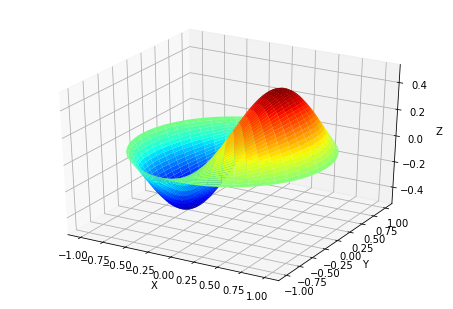

In [194]:
 from scipy import special
    
def drumhead_height(n,k,distance,angle,t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [216]:
from scipy import special
import numpy as np
x=2*1j*np.sqrt(-1j)
z0=special.jv(0,x)
z1=special.jv(1,x)
np.set_printoptions(precision=8,linewidth=214,suppress=True)     
print(z0,z1)

(0.751734182714-0.972291627307j) (0.997077651926+0.299775437002j)
